In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import catboost as cb
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Preparing data for explore

In [ ]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [ ]:
df.head()

In [ ]:
df.info()

**There are missing values in columns: Age, Cabin, and Embarke. Let's start with the Age column. We sholud replace the missing values with the average value. But first, let's look at data at the Age column in the way of the passenger class.**

In [ ]:
figure = plt.figure(figsize=(8, 5))
axes = figure.add_axes([0, 0, 1, 1])
sns.boxplot(y='Age', x='Pclass', data=df, palette=['crimson', 'royalblue', 'darkorange'], ax=axes)
axes.set_title('Survivor ratio', fontsize=16)
axes.set_xlabel('Passenger class', fontsize=14)
axes.set_ylabel('Age', fontsize=14)

**The graph shows that first-class passengers are older than second-class passengers, and second-class passengers are older than third-class passengers.**

In [ ]:
print('Average age of 1st class passengers ' + str(round(df[df['Pclass']==1]['Age'].mean(),0)))
print('Average age of 2nd class passengers ' + str(round(df[df['Pclass']==2]['Age'].mean(),0)))
print('Average age of 3rd class passengers ' + str(round(df[df['Pclass']==3]['Age'].mean(),0)))

In [ ]:
def age(columns):
  Age = columns[0]
  Pclass = columns[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 38
    elif Pclass == 2:
      return 30
    else:
      return 25
  else:
    return Age
df['Age'] = df[['Age', 'Pclass']].apply(age, axis=1)

**There are too many missing values in the Cabin column, so we have to delete it**

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

**Let's check the missing values in the Embarked column**

In [ ]:
df[df['Embarked'].isnull()]

**I googled the information about these passengers and this is what I found:**

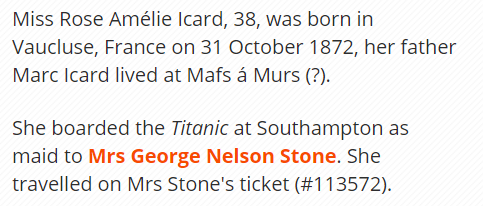

In [ ]:
df.loc[61, 'Embarked'] = ['S']
df.loc[829, 'Embarked'] = ['S']

# Explore data

**Let's check the ratio of survivors and deceased**

In [ ]:
figure = plt.figure()

axes = figure.add_axes([0, 0, 1, 1])
axes.pie(df['Survived'].value_counts(), autopct='%1.1f%%',
         labels=['No', 'Yes'],
         shadow=True,
         explode=[0, 0.3],
         pctdistance=0.3,
         labeldistance=0.8,
         textprops={'fontsize': 14},
         startangle=90,
         colors=['crimson', 'royalblue']
        )
axes.set_title('Survivor ratio', fontsize=18)
axes.legend(loc=2, bbox_to_anchor=(1, 1), fontsize=16)

**The graph shows that the ratio of deceased and survivors is not equally distributed**

**Let's analyze the ratio of survivors in the way of other indicators**

In [ ]:
figure = plt.figure()
sns.set_style('whitegrid')
axes1 = figure.add_axes([0, 0, 1, 1]) # Pclass
axes2 = figure.add_axes([1.3, 0, 1, 1]) # Sex 
axes3 = figure.add_axes([2.6, 0, 1, 1]) # Age
axes4 = figure.add_axes([0, -1.3, 1, 1]) # SibSp
axes5 = figure.add_axes([1.3, -1.3, 1, 1]) # Parch
axes6 = figure.add_axes([2.6, -1.3, 1, 1]) # Fare
axes7 = figure.add_axes([0, -2.6, 1, 1]) # Embarked

# Pclass
sns.countplot(x='Pclass', 
              hue='Survived', 
              data=df, 
              ax=axes1, 
              palette=['crimson', 'royalblue']
             )
axes1.set_title('Ratio of survivors and dead by Pclass', fontsize=16)
axes1.set_xlabel('Passenger class', fontsize=12)
for p in axes1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes1.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
axes1.legend(loc='upper right', facecolor='lightgray', fontsize=11)

# Sex
sns.countplot(x='Sex', 
              hue='Survived', 
              data=df, 
              ax=axes2, 
              palette=['crimson', 'royalblue']
             )
axes2.set_title('Ratio of survivors and dead by Sex', fontsize=16)
axes2.set_xlabel('Sex', fontsize=12)
for p in axes2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes2.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
axes2.legend(loc='upper right', facecolor='lightgray', fontsize=11)

# Age
sns.stripplot(x='Survived', 
              y='Age',
              data=df,
              ax=axes3,
              palette=['crimson', 'royalblue']
             )
axes3.set_title('Ratio of survivors and dead by Age', fontsize=16)
axes3.set_xlabel('Survived', fontsize=12)
axes3.legend(facecolor='lightgray', fontsize=11, labels=[0, 1])

#SibSp
sns.countplot(x='SibSp', 
              hue='Survived', 
              data=df, 
              ax=axes4, 
              palette=['crimson', 'royalblue']
             )
axes4.set_title('Ratio of survivors and dead by SibSp', fontsize=16)
axes4.set_xlabel('SibSp', fontsize=12)
for p in axes4.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes4.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
axes4.legend(loc='upper right', facecolor='lightgray', fontsize=11)

# Parch
sns.countplot(x='Parch', 
              hue='Survived', 
              data=df, 
              ax=axes5, 
              palette=['crimson', 'royalblue']
             )
axes5.set_title('Ratio of survivors and dead by Parch', fontsize=16)
axes5.set_xlabel('Parch', fontsize=12)
for p in axes5.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes5.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
axes5.legend(loc='upper right', facecolor='lightgray', fontsize=11)

# Fare
sns.stripplot(x='Survived', 
              y='Fare',
              data=df,
              ax=axes6,
              palette=['crimson', 'royalblue']
             )
axes6.set_title('Ratio of survivors and dead by Fare', fontsize=16)
axes6.set_xlabel('Survived', fontsize=12)
axes6.legend(facecolor='lightgray', fontsize=11, labels=[0, 1])

# Embarked
sns.countplot(x='Embarked', 
              hue='Survived', 
              data=df, 
              ax=axes7, 
              palette=['crimson', 'royalblue']
             )
axes7.set_title('Ratio of survivors and dead by Embarked', fontsize=16)
axes7.set_xlabel('Embarked', fontsize=12)
for p in axes7.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes7.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
axes7.legend(loc='upper right', facecolor='lightgray', fontsize=11)

* There is a relation between the class of passengers and the ratio of deceased and survivors: number of deceased in the third class is about 3 times more than number of survivors; in the second class, there is a small difference between number of deceased and number of survivors; in the first class number of deceased is less than number of survivors.
* There is a relation between gender and the ratio of deceased and survivors: number of deceased men is about 4 times more than number of survivors; number of deceased women is about 3 times less than number of survivors;
* Among older passengers number of fatalities is higher;
* The analysis of SibSp and Parch showed that number of deceased is higher among those who traveled alone;
* Passengers with more expensive tickets have more survivors;
* Number of deceased is less than number of survivors of passengers from the port of Cherbourg.

**The first, second, third and sixth conclusions are logical, let's check the reasons why the number of deceased is higher among those who were alone. We can assume that this is due to the fact that those who have traveled more than one were older and their class was higher.**

In [ ]:
figure = plt.figure()
axes1 = figure.add_axes([0, 0, 1, 1]) # SibSp - Age
axes2 = figure.add_axes([1.3, 0, 1, 1]) # SibSp - Pclass
axes3 = figure.add_axes([0, -1.3, 1, 1]) # Parch - Age 
axes4 = figure.add_axes([1.3, -1.3, 1, 1]) # Parch - Pclass

# SibSp - Age
sns.stripplot(x='SibSp', 
              y='Age',
              data=df,
              ax=axes1,
              palette=['crimson', 'royalblue', 'darkorange', 'violet', 'forestgreen', 'gold', 'sandybrown', 'pink']
             )
axes1.set_title('Ratio between SibSp and Age', fontsize=16)
axes1.set_xlabel('SibSp', fontsize=12)
axes1.legend(facecolor='lightgray', fontsize=11, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])

# SibSp - Pclass
sns.countplot(x='SibSp', 
              hue='Pclass', 
              data=df, 
              ax=axes2, 
              palette=['crimson', 'royalblue', 'darkorange']
             )
axes2.set_title('Ratio between SibSp and Pclass', fontsize=16)
axes2.set_xlabel('SibSp', fontsize=12)
for p in axes2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes2.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
axes2.legend(loc='upper right', facecolor='lightgray', fontsize=11)

# Parch - Age
sns.stripplot(x='Parch', 
              y='Age',
              data=df,
              ax=axes3,
              palette=['crimson', 'royalblue', 'darkorange', 'violet', 'forestgreen', 'gold']
             )
axes3.set_title('Ratio between Parch and Age', fontsize=16)
axes3.set_xlabel('Parch', fontsize=12)
axes3.legend(facecolor='lightgray', fontsize=11, labels=[0, 1, 2, 3, 4, 5, 6])

# Parch - Pclass
sns.countplot(x='Parch', 
              hue='Pclass', 
              data=df, 
              ax=axes4, 
              palette=['crimson', 'royalblue', 'darkorange']
             )
axes4.set_title('Ratio between Parch and Pclass', fontsize=16)
axes4.set_xlabel('SibSp', fontsize=12)
for p in axes4.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes4.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
axes4.legend(loc='upper right', facecolor='lightgray', fontsize=11)

**The assumption about the relation between age and the presence of fellow travelers was not confirmed. However, we observe that the biggest part of third-class passengers consists of passengers who were alone.**

**And now let's check why number of deceased is less than number of survivoried passengers from the port of Cherbourg. We will check the ticket price and the class of passengers.**

In [ ]:
figure = plt.figure()
axes1 = figure.add_axes([0, 0, 1, 1]) # Emarked - Fare
axes2 = figure.add_axes([1.3, 0, 1, 1]) # Embarked - Pclass

# Emarked - Fare
sns.stripplot(x='Embarked', 
              y='Fare',
              data=df,
              ax=axes1,
              palette=['crimson', 'royalblue', 'darkorange']
             )
axes1.set_title('Ratio between Embarked and Fare', fontsize=16)
axes1.set_xlabel('Embarked', fontsize=12)
axes1.legend(facecolor='lightgray', fontsize=11, labels=['Southampton', 'Cherbourg', 'Queenstown'])

# SibSp - Pclass
sns.countplot(x='Embarked', 
              hue='Pclass', 
              data=df, 
              ax=axes2, 
              palette=['crimson', 'royalblue', 'darkorange']
             )
axes2.set_title('Ratio between Embarked and Pclass', fontsize=16)
axes2.set_xlabel('Embarked', fontsize=12)
for p in axes2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes2.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')
axes2.legend(loc='upper right', facecolor='lightgray', fontsize=11)

**We see that the share of third-class passengers is the largest from the port of Southampton. According to the previous schedule, this port has the highest proportion of deceased.**

**Most of the variables were related to the class of passengers. Therefore, we can distinguish two main variables that have an impact - Sex and Pclass.**

# Preparing for predict

In [ ]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True) 
df = pd.concat([df, sex, embark], axis=1)
df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)
df.head()

In [ ]:
scaler = StandardScaler()
norm = scaler.fit_transform(df[['Age', 'Fare']])
df_norm = pd.DataFrame({'Age': norm[ :, 0], 'Fare' : norm[ :, 1]}, columns=['Age', 'Fare'])
df['Age'] = df_norm['Age']
df['Fare'] = df_norm['Fare']
df.head()

In [ ]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
os = SMOTE(random_state=42)
columns = x_train.columns
os_data_x,os_data_y = os.fit_resample(x_train, y_train.ravel())

# Training

In [ ]:
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']
             }
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_model.fit(os_data_x, os_data_y)
log_predict = log_model.predict(x_test)
log_cm = confusion_matrix(y_test, log_predict)
log_score = log_model.best_score_

In [ ]:
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']
         }
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_model.fit(os_data_x, os_data_y)
knn_predict = knn_model.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_predict)
knn_score = knn_model.best_score_

In [ ]:
svc_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100],
              'gamma':['scale', 'auto'], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] 
             }
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(os_data_x, os_data_y)
svc_predict = svc_model.predict(x_test)
svc_cm = confusion_matrix(y_test, svc_predict)
svc_score = svc_model.best_score_

In [ ]:
dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': list(range(3, 20, 2))
            }
dt_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_model.fit(os_data_x, os_data_y)
dt_predict = dt_model.predict(x_test)
dt_cm = confusion_matrix(y_test, dt_predict)
dt_score = dt_model.best_score_

In [ ]:
rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 26, 5)),
             'max_depth': list(range(3, 20, 2))
            }
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(os_data_x, os_data_y)
rf_predict = rf_model.predict(x_test)
rf_cm = confusion_matrix(y_test, rf_predict)
rf_score = rf_model.best_score_

In [ ]:
sgd_params = {'loss' : ['hinge', 'log', 'squared_hinge', 'modified_huber'],
              'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'penalty' : ['l2', 'l1', 'none'],
             }
sgd_model = GridSearchCV(SGDClassifier(max_iter=10000), sgd_params, cv=5)
sgd_model.fit(os_data_x, os_data_y)
sgd_predict = sgd_model.predict(x_test)
sgd_cm = confusion_matrix(y_test, sgd_predict)
sgd_score = sgd_model.best_score_

In [ ]:
lgb_params = {'n_estimators': [5, 10, 15, 20, 25, 50, 100],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'num_leaves': [7, 15, 31],
                  }
lgb_model = GridSearchCV(LGBMClassifier(), lgb_params, cv=5)
lgb_model.fit(os_data_x, os_data_y)
lgb_predict = lgb_model.predict(x_test)
lgb_cm = confusion_matrix(y_test, lgb_predict)
lgb_score = lgb_model.best_score_

In [ ]:
xgb_params = {'max_depth': [3, 5, 7, 9],
              'n_estimators': [5, 10, 15, 20, 25, 50, 100],
              'learning_rate': [0.01, 0.05, 0.1]
             }
xgb_model = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), xgb_params, cv=5)
xgb_model.fit(os_data_x, os_data_y)
xgb_predict = xgb_model.predict(x_test)
xgb_cm = confusion_matrix(y_test, xgb_predict)
xgb_score = xgb_model.best_score_

In [ ]:
cb_params = {'iterations': [5, 10, 15, 20, 25, 50, 100],
             'learning_rate': [0.01, 0.05, 0.1],
             'depth': [3, 5, 7, 9, 11, 13],
            }
cb_model = GridSearchCV(cb.CatBoostClassifier(verbose=False), cb_params, cv=5)
cb_model.fit(os_data_x, os_data_y)
cb_predict = cb_model.predict(x_test)
cb_cm = confusion_matrix(y_test, cb_predict)
cb_score = cb_model.best_score_

# Results

In [ ]:
figure = plt.figure()
axes1 = figure.add_axes([0, 0, 1, 1]) # log_model
axes2 = figure.add_axes([1, 0, 1, 1]) # knn_model
axes3 = figure.add_axes([2, 0, 1, 1]) # svc_model
axes4 = figure.add_axes([0, -1.3, 1, 1]) # dt_model
axes5 = figure.add_axes([1, -1.3, 1, 1]) # rf_model
axes6 = figure.add_axes([2, -1.3, 1, 1]) # rf_model
axes7 = figure.add_axes([0, -2.6, 1, 1]) # lgb_model
axes8 = figure.add_axes([1, -2.6, 1, 1]) # xgb_model
axes9 = figure.add_axes([2, -2.6, 1, 1]) # xgb_model

# log_model
axes1.imshow(log_cm, cmap='coolwarm')
axes1.grid(False)
axes1.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes1.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes1.set_title('Confusion matrix (LogisticRegression)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes1.text(j, i, log_cm[i, j], ha='center', va='center', color='black')

# knn_model
axes2.imshow(knn_cm, cmap='coolwarm')
axes2.grid(False)
axes2.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes2.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes2.set_title('Confusion matrix (KNeighborsClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes2.text(j, i, knn_cm[i, j], ha='center', va='center', color='black')

# svc_model
axes3.imshow(svc_cm, cmap='coolwarm')
axes3.grid(False)
axes3.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes3.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes3.set_title('Confusion matrix (SVC)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes3.text(j, i, svc_cm[i, j], ha='center', va='center', color='black')

# knn_model       
axes4.imshow(dt_cm, cmap='coolwarm')
axes4.grid(False)
axes4.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes4.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes4.set_title('Confusion matrix (DecisionTreeClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes4.text(j, i, dt_cm[i, j], ha='center', va='center', color='black')

# rf_model       
axes5.imshow(rf_cm, cmap='coolwarm')
axes5.grid(False)
axes5.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes5.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes5.set_title('Confusion matrix (RandomForestClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes5.text(j, i, rf_cm[i, j], ha='center', va='center', color='black')
        
# sgd_model       
axes6.imshow(sgd_cm, cmap='coolwarm')
axes6.grid(False)
axes6.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes6.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes6.set_title('Confusion matrix (SGDClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes6.text(j, i, sgd_cm[i, j], ha='center', va='center', color='black')

# lgb_model       
axes7.imshow(lgb_cm, cmap='coolwarm')
axes7.grid(False)
axes7.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes7.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes7.set_title('Confusion matrix (LGBMClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes7.text(j, i, lgb_cm[i, j], ha='center', va='center', color='black')
        
# xgb_model       
axes8.imshow(xgb_cm, cmap='coolwarm')
axes8.grid(False)
axes8.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes8.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes8.set_title('Confusion matrix (XGBClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes8.text(j, i, xgb_cm[i, j], ha='center', va='center', color='black')

# cb_model       
axes9.imshow(cb_cm, cmap='coolwarm')
axes9.grid(False)
axes9.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
axes9.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
axes9.set_title('Confusion matrix (CatBoostClassifier)', fontsize=16)
for i in range(2):
    for j in range(2):
        axes9.text(j, i, cb_cm[i, j], ha='center', va='center', color='black')

In [ ]:
models = ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 
          'RandomForestClassifier', 'SGDClassifier', 'LGBMClassifier', 'XGBClassifier', 'CatBoostClassifier']
scores = [log_score, knn_score, svc_score, dt_score, rf_score, sgd_score, lgb_score, xgb_score, cb_score]
score_table = pd.DataFrame({'Model':models, 'Score':scores})
score_table.sort_values(by='Score', axis=0, ascending=False)

**RandomForestClassifier - highest score**